In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import statsmodels.api as sm
import warnings
import os

# Set a modern style
plt.style.use('seaborn-v0_8-pastel')

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)

In [3]:
os.chdir('C:/Users/Ryo/OneDrive/Desktop/Master Thesis/master_thesis/study2')

In [4]:
file_loc = 'raw/Study2_June_14_2024_17.29_final.xlsx'
df = pd.read_excel(file_loc)
df

,ResponseId,Ads_OP_1,Ads_OP_2,Ads_OP_3,Ads_OP_4,Ads_OP_5,Ads_OP_6,Ads_CO_1,Ads_CO_2,Ads_CO_3,Ads_CO_4,Ads_CO_5,Ads_CO_6,Ads_EX_1,Ads_EX_2,Ads_EX_3,Ads_EX_4,Ads_EX_5,Ads_EX_6,Ads_AG_1,Ads_AG_2,Ads_AG_3,Ads_AG_4,Ads_AG_5,Ads_AG_6,Cha_OP_1,Cha_OP_2,Cha_OP_3,Cha_OP_4,Cha_OP_5,Cha_OP_6,Cha_OP_7,Cha_CO_1,Cha_CO_2,Cha_CO_3,Cha_CO_4,Cha_CO_5,Cha_CO_6,Cha_CO_7,Cha_EX_1,Cha_EX_2,Cha_EX_3,Cha_EX_4,Cha_EX_5,Cha_EX_6,Cha_EX_7,Cha_AG_1,Cha_AG_2,Cha_AG_3,Cha_AG_4,Cha_AG_5,Cha_AG_6,Cha_AG_7,big5_1,big5_2,big5_3,big5_4,big5_5,big5_6,big5_7,big5_8,big5_9,big5_10,big5_11,big5_12,big5_13,big5_14,big5_15,big5_16,big5_17,big5_18,big5_19,big5_20,big5_21,big5_22,big5_23,big5_24,big5_25,big5_26,big5_27,big5_28,big5_29,big5_30,gender,age,education,race,employment,income
0,{{%PROLIFIC_PID%}},30,0,45,31,46,47,45,0,37,47,42,43,37,46,41,43,42,45,55,44,40,41,40,46,50,61,66,68,71,64,63,60,63,55,62,63,60,60,34,28,32,30,50,39,39,38,0,0,0,54,0,0,5,4,4,4,5,2,2,4,4,3,2,3,3,4,2,1,3,3,3,2,3,5,4,4,4,4,3,2,2,3,1,31,4,4,2,2
1,5e49c48fac17f4000c1bfcbc,50,54,50,50,58,51,42,54,61,61,64,67,18,50,23,21,15,8,58,50,65,61,52,55,65,74,88,85,58,59,59,75,60,76,80,81,79,58,60,62,59,62,66,73,60,71,72,80,80,82,83,79,4,4,3,5,4,2,2,3,3,2,3,2,5,3,3,2,3,3,2,3,4,4,4,3,5,4,3,3,4,2,2,43,5,1,6,10
2,5f38251e3cec500d267efb92,20,15,30,25,30,15,75,80,79,90,77,85,80,85,97,89,82,100,73,73,83,71,74,90,95,84,100,100,100,90,100,88,98,97,91,97,86,86,86,88,100,100,96,100,80,98,100,97,97,100,95,94,4,4,2,3,2,4,2,2,2,1,3,4,4,4,4,3,2,3,4,3,2,4,4,4,5,1,3,2,2,2,1,22,4,1,2,1
3,5cd043b25b04850017e5d028,1,13,10,11,6,6,50,50,39,0,50,50,3,4,3,2,4,4,89,93,98,100,100,100,70,70,76,81,89,88,51,82,78,85,86,87,83,85,0,50,50,50,50,50,50,84,92,93,94,89,99,97,4,4,2,3,2,2,1,1,2,3,3,4,4,4,4,3,1,4,5,3,2,5,5,5,5,2,1,1,2,3,2,58,2,1,7,10
4,63d37e4ea0985c4dc486ff8e,60,40,60,60,70,70,40,40,40,30,30,30,70,70,80,80,80,80,40,20,20,20,40,30,60,71,80,71,90,80,75,84,82,83,86,80,82,80,75,79,71,77,77,78,76,90,85,84,91,91,87,94,4,4,3,5,4,2,4,3,5,4,2,1,4,2,4,3,5,4,3,2,4,4,4,4,4,2,5,4,4,2,1,32,4,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,648343299ec8050d10aee27d,0,0,0,0,0,0,20,61,20,60,10,1,0,0,0,0,0,0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,97,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,4,5,1,4,4,1,2,1,4,2,2,4,4,4,4,2,1,5,4,2,4,5,5,2,4,2,1,1,1,2,2,53,2,1,4,6
130,6601b51675d287d6a62f11c4,82,78,90,94,97,100,86,82,86,90,93,97,91,85,92,100,100,100,30,15,10,10,6,0,91,93,95,98,98,99,99,92,92,95,97,99,99,98,93,95,96,97,100,99,98,92,95,93,96,99,99,95,4,5,2,2,5,4,1,1,1,1,4,5,4,5,4,4,1,4,5,1,2,5,5,5,4,2,2,2,1,1,2,55,5,2,9,11
131,5daf506a5bd1b30013605e31,60,70,100,100,100,100,100,80,75,90,70,50,90,85,95,50,95,100,20,35,15,25,25,20,100,95,65,85,100,95,100,100,100,100,95,100,99,100,100,100,100,100,100,98,100,100,100,100,99,100,99,100,2,5,1,3,4,3,1,1,1,2,4,3,4,4,4,5,1,5,4,2,3,5,5,5,4,1,2,3,2,2,2,51,3,1,6,3
132,656f2e99bd2939f9b3f9d090,87,86,86,82,83,82,72,72,72,76,75,77,91,83,86,86,87,90,76,74,77,75,77,79,92,92,90,93,91,93,94,80,84,87,86,84,87,87,85,84,88,88,86,87,89,92,84,87,86,83,87,83,3,5,1,4,5,5,4,2,1,2,5,5,5,5,5,5,2,5,5,4,3,5,5,5,4,4,3,2,2,2,1,43,5,2,7,12


In [5]:
# Exclude invalid participants
preview_ids = ['{{%PROLIFIC_PID%}}']
pilot_ids = ['5e49c48fac17f4000c1bfcbc', '5f38251e3cec500d267efb92', '5cd043b25b04850017e5d028', '63d37e4ea0985c4dc486ff8e', '6565fff05ec125a5ff77a77c',
             '6146eadbe88132805e5e3139', '5b987c55bb32a600018302dc', '5f00b44e836b900755d6da5c', '60f5569b3a95a18a91dc5d21']
answer_not_valid_ids = ['65e33239b5fa3ca93950aa67', '5dbc46b70338051eb7999760', '640c92a322b87202716ce6a6', '65c017a404cde4687fdad22e', '5c6d7db58f6257000148f61d',
                        '5916bba1c40353000150c46c', '5efb31fa8cd32f04bf048643', '646792a49a85f35e7a7f5169', '664f9c1098a3ae9c463e6879', '643adb4a213b87bfc7e21e3f',
                        '662c62abadd0ff2671ea8876', '66188b0cd0f8a01345be56e7', '65d306f8b16eb5011ccb2025', '66350027a37d96b687525725', '6476122c3edb0289e7d0efb2',
                        '664decb8e9c4c9c4c3359ac8', '65f1b8db932f5ad974458e46', '6668fd75b5b602c2f510599a', '648343299ec8050d10aee27d', '5daf506a5bd1b30013605e31']

invalid_ids = preview_ids + pilot_ids + answer_not_valid_ids

print(f"original shape {df.shape}")
df = df[~df['ResponseId'].isin(invalid_ids)]
print(f"final df shape {df.shape}")

original shape (134, 89)
final df shape (104, 89)


In [6]:
df.dtypes

ResponseId    object
Ads_OP_1       int64
Ads_OP_2       int64
Ads_OP_3       int64
Ads_OP_4       int64
               ...  
age            int64
education      int64
race           int64
employment     int64
income         int64
Length: 89, dtype: object

In [7]:
df.isna().sum()

ResponseId    0
Ads_OP_1      0
Ads_OP_2      0
Ads_OP_3      0
Ads_OP_4      0
             ..
age           0
education     0
race          0
employment    0
income        0
Length: 89, dtype: int64

# Transform df

In [8]:
flag = 'big5_'
selected_cols = [col for col in df.columns if flag in col]
df_with_id = df[selected_cols]
#df = df.iloc[:,:-1] # remove attention check
df_with_id.insert(0, 'ResponseId', df['ResponseId'])
df_with_id.head()

,ResponseId,big5_1,big5_2,big5_3,big5_4,big5_5,big5_6,big5_7,big5_8,big5_9,big5_10,big5_11,big5_12,big5_13,big5_14,big5_15,big5_16,big5_17,big5_18,big5_19,big5_20,big5_21,big5_22,big5_23,big5_24,big5_25,big5_26,big5_27,big5_28,big5_29,big5_30
10,641c2b936dc70fab01d77dc6,4,4,3,2,2,4,3,3,3,3,5,5,4,5,4,4,1,2,3,2,3,4,5,4,3,2,3,2,2,4
11,641357b26802e397b5627d5e,2,4,2,4,4,4,2,2,1,1,4,4,5,4,4,5,5,4,4,2,2,4,4,5,4,4,4,2,1,2
12,66294a585f1cf3fdaeb80120,2,5,1,2,2,5,4,2,2,4,3,4,5,4,4,5,4,5,4,4,2,4,5,5,5,2,4,2,2,2
13,661571d6cc16ee34676734df,3,4,3,5,5,3,3,4,4,2,3,3,4,2,4,3,3,2,2,2,3,4,4,3,4,2,3,3,4,2
14,6629f95a14b6006e6a4b0aef,4,5,4,4,4,4,1,4,4,1,4,2,5,4,4,2,1,4,4,2,2,5,4,4,4,4,2,2,2,2


In [9]:
flag = 'big5_'
selected_cols = [col for col in df.columns if flag in col]
df = df[selected_cols]
#df = df.iloc[:,:-1] # remove attention check
df.head()

,big5_1,big5_2,big5_3,big5_4,big5_5,big5_6,big5_7,big5_8,big5_9,big5_10,big5_11,big5_12,big5_13,big5_14,big5_15,big5_16,big5_17,big5_18,big5_19,big5_20,big5_21,big5_22,big5_23,big5_24,big5_25,big5_26,big5_27,big5_28,big5_29,big5_30
10,4,4,3,2,2,4,3,3,3,3,5,5,4,5,4,4,1,2,3,2,3,4,5,4,3,2,3,2,2,4
11,2,4,2,4,4,4,2,2,1,1,4,4,5,4,4,5,5,4,4,2,2,4,4,5,4,4,4,2,1,2
12,2,5,1,2,2,5,4,2,2,4,3,4,5,4,4,5,4,5,4,4,2,4,5,5,5,2,4,2,2,2
13,3,4,3,5,5,3,3,4,4,2,3,3,4,2,4,3,3,2,2,2,3,4,4,3,4,2,3,3,4,2
14,4,5,4,4,4,4,1,4,4,1,4,2,5,4,4,2,1,4,4,2,2,5,4,4,4,4,2,2,2,2


In [10]:
reversed = [1, 21, 26, 7, 17, 27, 3, 8, 28, 14, 19, 24, 10, 20, 30]

big5 = dict({
             'Extraversion' : [1, 6, 11, 16, 21, 26],
             'Agreeableness' : [2, 7, 12, 17, 22, 27],
             'Conscientiousness' : [3, 8, 13, 18, 23, 28],
             'Neuroticism' : [4, 9, 14, 19, 24, 29],
             'Open_Mindedness' : [5, 10, 15, 20, 25, 30]})

big5

{'Extraversion': [1, 6, 11, 16, 21, 26],
 'Agreeableness': [2, 7, 12, 17, 22, 27],
 'Conscientiousness': [3, 8, 13, 18, 23, 28],
 'Neuroticism': [4, 9, 14, 19, 24, 29],
 'Open_Mindedness': [5, 10, 15, 20, 25, 30]}

In [11]:
list(big5.keys())[0]

'Extraversion'

In [12]:
for value in big5.values():
    print(value)

[1, 6, 11, 16, 21, 26]
[2, 7, 12, 17, 22, 27]
[3, 8, 13, 18, 23, 28]
[4, 9, 14, 19, 24, 29]
[5, 10, 15, 20, 25, 30]


In [13]:
df_c = df.copy()
df_c.columns = [col.split('_')[1] for col in df_c.columns]
df_c.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
10,4,4,3,2,2,4,3,3,3,3,5,5,4,5,4,4,1,2,3,2,3,4,5,4,3,2,3,2,2,4
11,2,4,2,4,4,4,2,2,1,1,4,4,5,4,4,5,5,4,4,2,2,4,4,5,4,4,4,2,1,2
12,2,5,1,2,2,5,4,2,2,4,3,4,5,4,4,5,4,5,4,4,2,4,5,5,5,2,4,2,2,2
13,3,4,3,5,5,3,3,4,4,2,3,3,4,2,4,3,3,2,2,2,3,4,4,3,4,2,3,3,4,2
14,4,5,4,4,4,4,1,4,4,1,4,2,5,4,4,2,1,4,4,2,2,5,4,4,4,4,2,2,2,2


In [14]:
def reverse_scores(row, df, col_str):
    # 5 = max big 5 questionaries score
    return (max(df[col_str].max(), 5) + 1) - row

In [15]:
for col in reversed:
    col_str = str(col)
    if col_str in df_c.columns:
        df_c[col_str] = df_c[col_str].apply(lambda row: reverse_scores(row, df_c, col_str))

df_c.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
10,2,4,3,2,2,4,3,3,3,3,5,5,4,1,4,4,5,2,3,4,3,4,5,2,3,4,3,4,2,2
11,4,4,4,4,4,4,4,4,1,5,4,4,5,2,4,5,1,4,2,4,4,4,4,1,4,2,2,4,1,4
12,4,5,5,2,2,5,2,4,2,2,3,4,5,2,4,5,2,5,2,2,4,4,5,1,5,4,2,4,2,4
13,3,4,3,5,5,3,3,2,4,4,3,3,4,4,4,3,3,2,4,4,3,4,4,3,4,4,3,3,4,4
14,2,5,2,4,4,4,5,2,4,5,4,2,5,2,4,2,5,4,2,4,4,5,4,2,4,2,4,4,2,4


In [16]:
# Initialize a dictionary to store the Big 5 traits
big5_scores = {trait: [] for trait in big5.keys()}

# Add columns to the dictionary
for col in df_c.columns:
    question_num = int(col)
    for trait, values in big5.items():
        if question_num in values:
            big5_scores[trait].append(df_c[col])

# Convert lists to DataFrame and calculate mean while ignoring NaN values
for trait, scores in big5_scores.items():
    df_c[trait] = pd.concat(scores, axis=1).mean(axis=1)

# Display the head of the DataFrame
df_c.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Open_Mindedness
10,2,4,3,2,2,4,3,3,3,3,5,5,4,1,4,4,5,2,3,4,3,4,5,2,3,4,3,4,2,2,3.666667,4.000000,3.500000,2.166667,3.000000
11,4,4,4,4,4,4,4,4,1,5,4,4,5,2,4,5,1,4,2,4,4,4,4,1,4,2,2,4,1,4,3.833333,3.166667,4.166667,1.833333,4.166667
12,4,5,5,2,2,5,2,4,2,2,3,4,5,2,4,5,2,5,2,2,4,4,5,1,5,4,2,4,2,4,4.166667,3.166667,4.666667,1.833333,3.166667
13,3,4,3,5,5,3,3,2,4,4,3,3,4,4,4,3,3,2,4,4,3,4,4,3,4,4,3,3,4,4,3.166667,3.333333,3.000000,4.000000,4.166667
14,2,5,2,4,4,4,5,2,4,5,4,2,5,2,4,2,5,4,2,4,4,5,4,2,4,2,4,4,2,4,3.000000,4.333333,3.500000,2.666667,4.166667


In [17]:
'''
for col in df_c.columns:
    question_num = int(col)
    for i, values in enumerate(list(big5.values())):
        if int(question_num) in values:
            new_col = list(big5.keys())[i]
    if new_col not in df_c.columns:
        df_c[new_col] = df_c[col]
    else: 
        df_c[new_col] = df_c[new_col] + df_c[col]

df_c.head(5)
'''

'\nfor col in df_c.columns:\n    question_num = int(col)\n    for i, values in enumerate(list(big5.values())):\n        if int(question_num) in values:\n            new_col = list(big5.keys())[i]\n    if new_col not in df_c.columns:\n        df_c[new_col] = df_c[col]\n    else: \n        df_c[new_col] = df_c[new_col] + df_c[col]\n\ndf_c.head(5)\n'

In [18]:
df_c.max()

1                    5.0
2                    5.0
3                    5.0
4                    5.0
5                    5.0
6                    5.0
7                    5.0
8                    5.0
9                    5.0
10                   5.0
11                   5.0
12                   5.0
13                   5.0
14                   4.0
15                   5.0
16                   5.0
17                   5.0
18                   5.0
19                   6.0
20                   6.0
21                   5.0
22                   5.0
23                   5.0
24                   4.0
25                   5.0
26                   5.0
27                   6.0
28                   5.0
29                   5.0
30                   5.0
Extraversion         5.0
Agreeableness        5.0
Conscientiousness    5.0
Neuroticism          4.5
Open_Mindedness      5.0
dtype: float64

In [19]:
final_columns = list(big5.keys())
df_final = df_c[final_columns]

In [20]:
df_final = df_final.drop(columns = {'Neuroticism'}, axis = 1)
df_final.head(6)

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness
10,3.666667,4.000000,3.500000,3.000000
11,3.833333,3.166667,4.166667,4.166667
12,4.166667,3.166667,4.666667,3.166667
13,3.166667,3.333333,3.000000,4.166667
14,3.000000,4.333333,3.500000,4.166667
15,3.166667,3.666667,2.333333,5.000000


In [21]:
df_final.head(6)

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness
10,3.666667,4.000000,3.500000,3.000000
11,3.833333,3.166667,4.166667,4.166667
12,4.166667,3.166667,4.666667,3.166667
13,3.166667,3.333333,3.000000,4.166667
14,3.000000,4.333333,3.500000,4.166667
15,3.166667,3.666667,2.333333,5.000000


array([[<Axes: title={'center': 'Extraversion'}>,
        <Axes: title={'center': 'Agreeableness'}>],
       [<Axes: title={'center': 'Conscientiousness'}>,
        <Axes: title={'center': 'Open_Mindedness'}>]], dtype=object)

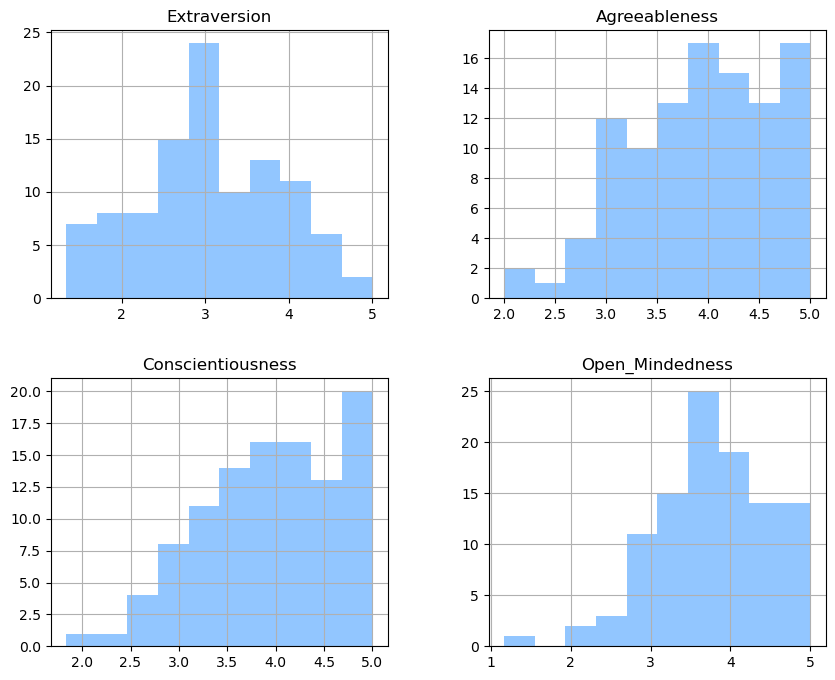

In [22]:
df_final.hist(figsize=(10,8))

In [23]:
df_final.corr()

,Extraversion,Agreeableness,Conscientiousness,Open_Mindedness
Extraversion,1.000000,0.130244,0.356257,0.171136
Agreeableness,0.130244,1.000000,0.347496,-0.023883
Conscientiousness,0.356257,0.347496,1.000000,0.089948
Open_Mindedness,0.171136,-0.023883,0.089948,1.000000


In [24]:
df_final.shape

(104, 4)

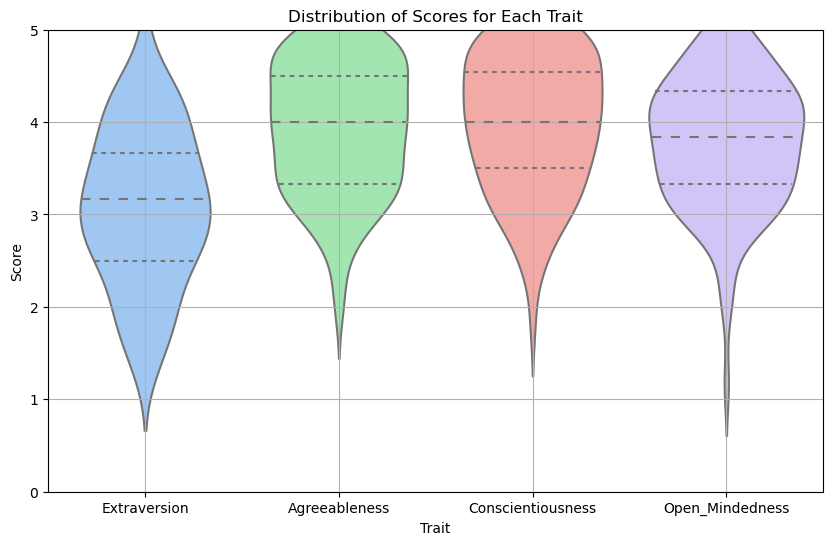

In [30]:
# Melt the DataFrame
df_melted = df_final.melt(var_name='Trait', value_name='Score')

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Trait', y='Score', data=df_melted, inner='quartile')
plt.title('Distribution of Scores for Each Trait')
plt.ylim(0, 5)
plt.xlabel('Trait')
plt.ylabel('Score')
plt.grid(True)

# Show the plot
plt.show()

In [26]:
for col in df_final.columns.tolist():
    print(f"{col} median = {df_final[col].median()}")

Extraversion median = 3.1666666666666665
Agreeableness median = 4.0
Conscientiousness median = 4.0
Open_Mindedness median = 3.8333333333333335


In [27]:
for col in df_final.columns.tolist():
    print(f"{col} mean = {df_final[col].mean()}")

Extraversion mean = 3.081730769230769
Agreeableness mean = 3.9278846153846154
Conscientiousness mean = 3.9711538461538463
Open_Mindedness mean = 3.772435897435898


In [28]:
# Create a dictionary to store the median values
median_dict = {col: df_final[col].median() for col in df_final.columns}

# Convert the dictionary to a DataFrame
df_medians = pd.DataFrame([median_dict])

# Display the DataFrame
print("DataFrame of median values:")
print(df_medians)


DataFrame of median values:
   Extraversion  Agreeableness  Conscientiousness  Open_Mindedness
0      3.166667            4.0                4.0         3.833333


In [29]:
df_medians.to_csv('C:/Users/Ryo/OneDrive/Desktop/Master Thesis/master_thesis/study3/raw/mixed_trait_scores.csv', index=False)